In [1]:
import pandas as pd

In [2]:
deliveries_df = pd.read_csv(r"C:\Users\sanja\Downloads\diminos_data_v2\diminos_data_v2\deliveries.csv")

In [3]:
deliveries_df.head()

,order_id,time_stamp,status
0,321230114,2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:19:13.299151076,Delivered
3,321230115,2020-12-11 00:36:02.000000000,Pending
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery


In [4]:
order_items_df = pd.read_csv(r"C:\Users\sanja\Downloads\diminos_data_v2\diminos_data_v2\order_items.csv")
order_items_df.head()

,order_id,items_ordered
0,321230114,"['p_025', 'p_032', 'p_037']"
1,321230115,"['p_017', 'p_012']"
2,321230116,"['p_027', 'p_037']"
3,321230117,"['p_004', 'p_029']"
4,321230118,"['p_017', 'p_037']"


In [5]:
orders_df = pd.read_csv(r"C:\Users\sanja\Downloads\diminos_data_v2\diminos_data_v2\orders.csv")
orders_df.head()

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20


In [6]:
products_df = pd.read_csv(r"C:\Users\sanja\Downloads\diminos_data_v2\diminos_data_v2\products.csv")
products_df.head()

,item_id,category,Item,Size,Price
0,p_001,Veg,Margherita,Regular,109
1,p_002,Veg,Margherita,Medium,245
2,p_003,Veg,Margherita,Large,455
3,p_004,Veg,Double Cheese Margherita,Regular,215
4,p_005,Veg,Double Cheese Margherita,Medium,385


###### 1.What is the average Delivery Time (in minutes) taken by the store to deliver the Pizza?
* Round off the answer upto 2 decimal places.

In [7]:
from datetime import datetime

In [8]:
merged_df1 = pd.merge(deliveries_df,orders_df)

In [9]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363008 entries, 0 to 1363007
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   order_id         1363008 non-null  int64 
 1   time_stamp       1363008 non-null  object
 2   status           1363008 non-null  object
 3   order_placed_at  1363008 non-null  object
dtypes: int64(1), object(3)
memory usage: 41.6+ MB


In [10]:
merged_df1['time_stamp'] = pd.to_datetime(merged_df1['time_stamp'])

In [11]:
merged_df1['order_placed_at'] = pd.to_datetime(merged_df1['order_placed_at'])

In [12]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363008 entries, 0 to 1363007
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   order_id         1363008 non-null  int64         
 1   time_stamp       1363008 non-null  datetime64[ns]
 2   status           1363008 non-null  object        
 3   order_placed_at  1363008 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 41.6+ MB


In [13]:
merged_df1['Duration'] = (merged_df1['time_stamp'] - merged_df1['order_placed_at']).dt.total_seconds()/60

In [14]:
round(merged_df1['Duration'].mean(),2)

8.55

###### 2. What is the 99th percentile Delivery Time (in minutes) taken by the store to deliver the Pizza?

In [15]:
round(merged_df1['Duration'].quantile(0.99),2)

27.75

###### 3. Which metric is the better choice to determine the stores performance based on Delivery Time?

###### median

In [16]:
round(merged_df1['Duration'].median(),2)

5.0

###### 95% 

In [17]:
round(merged_df1['Duration'].quantile(0.95),2)

23.37

###### 99%

In [18]:
round(merged_df1['Duration'].quantile(0.99),2)

27.75

In [19]:
round(merged_df1['Duration'].std(),2)

8.96

median, 95% and 99% better choice to determine the stores performance based on Delivery Time

###### 4.What is the order id with the maximum delivery time?

In [20]:
merged_df1['Duration'].max()

62.912078128716665

In [21]:
merged_df1[merged_df1['Duration'] == 62.912078128716665]['order_id'].values[0]

321629049

###### 5. How many pizza's were ordered between 1st January and 31st January 2024 (INCLUSIVE)?

In [22]:
merged_df1.head()

,order_id,time_stamp,status,order_placed_at,Duration
0,321230114,2020-12-11 00:01:29.000000000,Pending,2020-12-11 00:01:29,0.000000
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery,2020-12-11 00:01:29,5.000000
2,321230114,2020-12-11 00:19:13.299151076,Delivered,2020-12-11 00:01:29,17.738319
3,321230115,2020-12-11 00:36:02.000000000,Pending,2020-12-11 00:36:02,0.000000
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery,2020-12-11 00:36:02,5.000000


In [23]:
sep_jan = merged_df1[merged_df1['order_placed_at'].dt.month_name() == 'January']

In [24]:
jan_data = sep_jan[sep_jan['order_placed_at'].dt.year == 2024]

In [25]:
len(jan_data)

36912

###### 6. How many order took more than 30 minutes to deliver between 1st January and 31st January 2024 (INCLUSIVE)?

This is important as Diminos promise 30 minutes delivery. For any pizza delivered after 30 minutes, customer will get a full refund.

In [26]:
more_than_30_min = jan_data[jan_data['Duration'] > 30]

In [27]:
jan_data.columns

Index(['order_id', 'time_stamp', 'status', 'order_placed_at', 'Duration'], dtype='object')

In [28]:
len(more_than_30_min)

162

###### 7. What is the total amount Pizza store lost in 2023 due to refunds on late deliveries?

In [29]:
merged_df1

,order_id,time_stamp,status,order_placed_at,Duration
0,321230114,2020-12-11 00:01:29.000000000,Pending,2020-12-11 00:01:29,0.000000
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery,2020-12-11 00:01:29,5.000000
2,321230114,2020-12-11 00:19:13.299151076,Delivered,2020-12-11 00:01:29,17.738319
3,321230115,2020-12-11 00:36:02.000000000,Pending,2020-12-11 00:36:02,0.000000
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery,2020-12-11 00:36:02,5.000000
...,...,...,...,...,...
1363003,321684449,2024-02-01 00:00:46.000000000,Out For Delivery,2024-01-31 23:55:46,5.000000
1363004,321684449,2024-02-01 00:14:56.997433391,Delivered,2024-01-31 23:55:46,19.183291
1363005,321684448,2024-01-31 23:58:05.000000000,Pending,2024-01-31 23:58:05,0.000000
1363006,321684448,2024-02-01 00:03:05.000000000,Out For Delivery,2024-01-31 23:58:05,5.000000


In [30]:
df_total = pd.merge(merged_df1,order_items_df,on = 'order_id')

In [31]:
df_total

,order_id,time_stamp,status,order_placed_at,Duration,items_ordered
0,321230114,2020-12-11 00:01:29.000000000,Pending,2020-12-11 00:01:29,0.000000,"['p_025', 'p_032', 'p_037']"
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery,2020-12-11 00:01:29,5.000000,"['p_025', 'p_032', 'p_037']"
2,321230114,2020-12-11 00:19:13.299151076,Delivered,2020-12-11 00:01:29,17.738319,"['p_025', 'p_032', 'p_037']"
3,321230115,2020-12-11 00:36:02.000000000,Pending,2020-12-11 00:36:02,0.000000,"['p_017', 'p_012']"
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery,2020-12-11 00:36:02,5.000000,"['p_017', 'p_012']"
...,...,...,...,...,...,...
1363003,321684449,2024-02-01 00:00:46.000000000,Out For Delivery,2024-01-31 23:55:46,5.000000,"['p_022', 'p_037']"
1363004,321684449,2024-02-01 00:14:56.997433391,Delivered,2024-01-31 23:55:46,19.183291,"['p_022', 'p_037']"
1363005,321684448,2024-01-31 23:58:05.000000000,Pending,2024-01-31 23:58:05,0.000000,"['p_007', 'p_003', 'p_037']"
1363006,321684448,2024-02-01 00:03:05.000000000,Out For Delivery,2024-01-31 23:58:05,5.000000,"['p_007', 'p_003', 'p_037']"


In [32]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363008 entries, 0 to 1363007
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   order_id         1363008 non-null  int64         
 1   time_stamp       1363008 non-null  datetime64[ns]
 2   status           1363008 non-null  object        
 3   order_placed_at  1363008 non-null  datetime64[ns]
 4   Duration         1363008 non-null  float64       
 5   items_ordered    1363008 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 62.4+ MB


In [33]:
products_df.head()

,item_id,category,Item,Size,Price
0,p_001,Veg,Margherita,Regular,109
1,p_002,Veg,Margherita,Medium,245
2,p_003,Veg,Margherita,Large,455
3,p_004,Veg,Double Cheese Margherita,Regular,215
4,p_005,Veg,Double Cheese Margherita,Medium,385


In [34]:
pro_df = products_df[['item_id','Price']]

In [35]:
pro_df

,item_id,Price
0,p_001,109
1,p_002,245
2,p_003,455
3,p_004,215
4,p_005,385
5,p_006,619
6,p_007,265
7,p_008,469
8,p_009,705
9,p_010,219


In [36]:
item_keys = pd.Series(pro_df.item_id.values,index=pro_df.index)

In [37]:
item_keys

0     p_001
1     p_002
2     p_003
3     p_004
4     p_005
5     p_006
6     p_007
7     p_008
8     p_009
9     p_010
10    p_011
11    p_012
12    p_013
13    p_014
14    p_015
15    p_016
16    p_017
17    p_018
18    p_019
19    p_020
20    p_021
21    p_022
22    p_023
23    p_024
24    p_025
25    p_026
26    p_027
27    p_028
28    p_029
29    p_030
30    p_031
31    p_032
32    p_033
33    p_034
34    p_035
35    p_036
36    p_037
dtype: object

In [38]:
item_price = pd.Series(pro_df.Price.values,index=pro_df.index)

In [39]:
item_price

0     109
1     245
2     455
3     215
4     385
5     619
6     265
7     469
8     705
9     219
10    385
11    619
12    179
13    319
14    519
15    305
16    559
17    815
18    279
19    499
20    729
21    365
22    609
23    935
24    365
25    609
26    935
27    239
28    419
29    629
30    339
31    599
32    879
33    365
34    609
35    935
36     71
dtype: int64

In [40]:
items = dict()
for i,j in zip(item_keys,item_price):
    items[i]=j

In [41]:
items

{'p_001': 109,
 'p_002': 245,
 'p_003': 455,
 'p_004': 215,
 'p_005': 385,
 'p_006': 619,
 'p_007': 265,
 'p_008': 469,
 'p_009': 705,
 'p_010': 219,
 'p_011': 385,
 'p_012': 619,
 'p_013': 179,
 'p_014': 319,
 'p_015': 519,
 'p_016': 305,
 'p_017': 559,
 'p_018': 815,
 'p_019': 279,
 'p_020': 499,
 'p_021': 729,
 'p_022': 365,
 'p_023': 609,
 'p_024': 935,
 'p_025': 365,
 'p_026': 609,
 'p_027': 935,
 'p_028': 239,
 'p_029': 419,
 'p_030': 629,
 'p_031': 339,
 'p_032': 599,
 'p_033': 879,
 'p_034': 365,
 'p_035': 609,
 'p_036': 935,
 'p_037': 71}

In [42]:
items.get('p_024')

935

In [43]:
df_total

,order_id,time_stamp,status,order_placed_at,Duration,items_ordered
0,321230114,2020-12-11 00:01:29.000000000,Pending,2020-12-11 00:01:29,0.000000,"['p_025', 'p_032', 'p_037']"
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery,2020-12-11 00:01:29,5.000000,"['p_025', 'p_032', 'p_037']"
2,321230114,2020-12-11 00:19:13.299151076,Delivered,2020-12-11 00:01:29,17.738319,"['p_025', 'p_032', 'p_037']"
3,321230115,2020-12-11 00:36:02.000000000,Pending,2020-12-11 00:36:02,0.000000,"['p_017', 'p_012']"
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery,2020-12-11 00:36:02,5.000000,"['p_017', 'p_012']"
...,...,...,...,...,...,...
1363003,321684449,2024-02-01 00:00:46.000000000,Out For Delivery,2024-01-31 23:55:46,5.000000,"['p_022', 'p_037']"
1363004,321684449,2024-02-01 00:14:56.997433391,Delivered,2024-01-31 23:55:46,19.183291,"['p_022', 'p_037']"
1363005,321684448,2024-01-31 23:58:05.000000000,Pending,2024-01-31 23:58:05,0.000000,"['p_007', 'p_003', 'p_037']"
1363006,321684448,2024-02-01 00:03:05.000000000,Out For Delivery,2024-01-31 23:58:05,5.000000,"['p_007', 'p_003', 'p_037']"


In [44]:
def add(items):
    join_str =''.join(items)
    clean_str = join_str.strip("[]' ")
    cor_list = [i.strip() for i in clean_str.split(',')]
    return cor_list

In [45]:
df_total['items_ordered'] = df_total['items_ordered'].apply(add)

In [46]:
df_total['items_ordered']

0          [p_025', 'p_032', 'p_037]
1          [p_025', 'p_032', 'p_037]
2          [p_025', 'p_032', 'p_037]
3                   [p_017', 'p_012]
4                   [p_017', 'p_012]
                     ...            
1363003             [p_022', 'p_037]
1363004             [p_022', 'p_037]
1363005    [p_007', 'p_003', 'p_037]
1363006    [p_007', 'p_003', 'p_037]
1363007    [p_007', 'p_003', 'p_037]
Name: items_ordered, Length: 1363008, dtype: object

In [47]:
def cal_total_price(items_list):
    cleaned_items = [item.strip("'") for item in items_list]
    return sum(items[item] for item in cleaned_items)

In [48]:
df_total['total_price'] = df_total['items_ordered'].apply(cal_total_price)

In [49]:
df_total

,order_id,time_stamp,status,order_placed_at,Duration,items_ordered,total_price
0,321230114,2020-12-11 00:01:29.000000000,Pending,2020-12-11 00:01:29,0.000000,"[p_025', 'p_032', 'p_037]",1035
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery,2020-12-11 00:01:29,5.000000,"[p_025', 'p_032', 'p_037]",1035
2,321230114,2020-12-11 00:19:13.299151076,Delivered,2020-12-11 00:01:29,17.738319,"[p_025', 'p_032', 'p_037]",1035
3,321230115,2020-12-11 00:36:02.000000000,Pending,2020-12-11 00:36:02,0.000000,"[p_017', 'p_012]",1178
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery,2020-12-11 00:36:02,5.000000,"[p_017', 'p_012]",1178
...,...,...,...,...,...,...,...
1363003,321684449,2024-02-01 00:00:46.000000000,Out For Delivery,2024-01-31 23:55:46,5.000000,"[p_022', 'p_037]",436
1363004,321684449,2024-02-01 00:14:56.997433391,Delivered,2024-01-31 23:55:46,19.183291,"[p_022', 'p_037]",436
1363005,321684448,2024-01-31 23:58:05.000000000,Pending,2024-01-31 23:58:05,0.000000,"[p_007', 'p_003', 'p_037]",791
1363006,321684448,2024-02-01 00:03:05.000000000,Out For Delivery,2024-01-31 23:58:05,5.000000,"[p_007', 'p_003', 'p_037]",791


In [50]:
refund = df_total[df_total['order_placed_at'].dt.year == 2023]

In [51]:
refund['status'].unique()

array(['Pending', 'Out For Delivery', 'Delivered'], dtype=object)

In [52]:
loss_amount = refund[refund['Duration']>30]
loss_amount

,order_id,time_stamp,status,order_placed_at,Duration,items_ordered,total_price
871790,321520710,2023-01-01 07:13:53.796142791,Delivered,2023-01-01 06:43:17,30.613269,"[p_020', 'p_030', 'p_037]",1199
872003,321520781,2023-01-01 12:21:27.548250439,Delivered,2023-01-01 11:50:08,31.325804,"[p_003', 'p_023]",1064
872297,321520881,2023-01-01 16:09:22.481604124,Delivered,2023-01-01 15:32:36,36.774693,"[p_023', 'p_005', 'p_037]",1065
872411,321520917,2023-01-01 18:05:14.271442042,Delivered,2023-01-01 17:33:28,31.771191,"[p_019', 'p_035', 'p_037]",959
872504,321520947,2023-01-01 19:33:06.691488219,Delivered,2023-01-01 19:01:40,31.444858,"[p_034', 'p_024', 'p_037]",1371
...,...,...,...,...,...,...,...
1324913,321671750,2023-12-31 03:16:59.733576587,Delivered,2023-12-31 02:45:46,31.228893,"[p_016', 'p_035', 'p_037]",985
1325021,321671786,2023-12-31 08:14:03.021796853,Delivered,2023-12-31 07:43:40,30.383697,"[p_006', 'p_034', 'p_037]",1055
1325138,321671826,2023-12-31 10:54:48.241061676,Delivered,2023-12-31 10:17:18,37.504018,"[p_029', 'p_006]",1038
1325858,321672065,2023-12-31 21:02:07.686868217,Delivered,2023-12-31 20:27:16,34.861448,"[p_021', 'p_037]",800


In [53]:
len(loss_amount['total_price'].values)

2003

In [54]:
loss_amount_2023 = sum(loss_amount['total_price'].values)
loss_amount_2023

1826393

###### 8. In which year Pizza store has lost maximum amount due to refunds on late deliveries?

In [55]:
df_total['order_placed_at'].dt.year.unique()

array([2020, 2021, 2022, 2023, 2024])

#### loss_amount_20220

In [56]:
refund = df_total[df_total['order_placed_at'].dt.year == 2020]
loss_amount = refund[refund['Duration']>30]
loss_amount_2020 = sum(loss_amount['total_price'].values)
loss_amount_2020

96688

#### loss_amount_2021

In [57]:
refund = df_total[df_total['order_placed_at'].dt.year == 2021]
loss_amount = refund[refund['Duration']>30]
loss_amount_2021 = sum(loss_amount['total_price'].values)
loss_amount_2021

1791568

#### loss_amount_2022

In [58]:
refund = df_total[df_total['order_placed_at'].dt.year == 2022]
loss_amount = refund[refund['Duration']>30]
loss_amount_2022 = sum(loss_amount['total_price'].values)
loss_amount_2022

1664113

#### loss_amount_2023

In [59]:
loss_amount_2023

1826393

#### loss_amount_2024

In [60]:
refund = df_total[df_total['order_placed_at'].dt.year == 2024]
loss_amount = refund[refund['Duration']>30]
loss_amount_2024 = sum(loss_amount['total_price'].values)
loss_amount_2024

145669

###### 9. How much revenue is generated by the pizza store till date? Don't include the refund amount in revenue.

In [61]:
df_total['status'].unique()

array(['Pending', 'Out For Delivery', 'Delivered'], dtype=object)

In [62]:
revenue = df_total[(df_total['status'] == 'Pending') | (df_total['status'] == "Out For Delivery")]

In [63]:
sum(revenue['total_price'].values)

815668974

###### 10. (BONUS QUESTION) Which distribution can be used to model the number of orders incoming each hour? If we can somehow model it, which problem for owner of Pizza Store can be solved? 

In [64]:
df_total['hours'] = df_total['time_stamp'].dt.hour

In [65]:
df_total

,order_id,time_stamp,status,order_placed_at,Duration,items_ordered,total_price,hours
0,321230114,2020-12-11 00:01:29.000000000,Pending,2020-12-11 00:01:29,0.000000,"[p_025', 'p_032', 'p_037]",1035,0
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery,2020-12-11 00:01:29,5.000000,"[p_025', 'p_032', 'p_037]",1035,0
2,321230114,2020-12-11 00:19:13.299151076,Delivered,2020-12-11 00:01:29,17.738319,"[p_025', 'p_032', 'p_037]",1035,0
3,321230115,2020-12-11 00:36:02.000000000,Pending,2020-12-11 00:36:02,0.000000,"[p_017', 'p_012]",1178,0
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery,2020-12-11 00:36:02,5.000000,"[p_017', 'p_012]",1178,0
...,...,...,...,...,...,...,...,...
1363003,321684449,2024-02-01 00:00:46.000000000,Out For Delivery,2024-01-31 23:55:46,5.000000,"[p_022', 'p_037]",436,0
1363004,321684449,2024-02-01 00:14:56.997433391,Delivered,2024-01-31 23:55:46,19.183291,"[p_022', 'p_037]",436,0
1363005,321684448,2024-01-31 23:58:05.000000000,Pending,2024-01-31 23:58:05,0.000000,"[p_007', 'p_003', 'p_037]",791,23
1363006,321684448,2024-02-01 00:03:05.000000000,Out For Delivery,2024-01-31 23:58:05,5.000000,"[p_007', 'p_003', 'p_037]",791,0


In [66]:
orders_count = df_total.groupby('hours').size()

In [67]:
mean_orders_per_hour = orders_count.mean()

In [68]:
print(f'Mean number of orders per hour: {mean_orders_per_hour}')

Mean number of orders per hour: 56792.0


In [69]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

<BarContainer object of 24 artists>

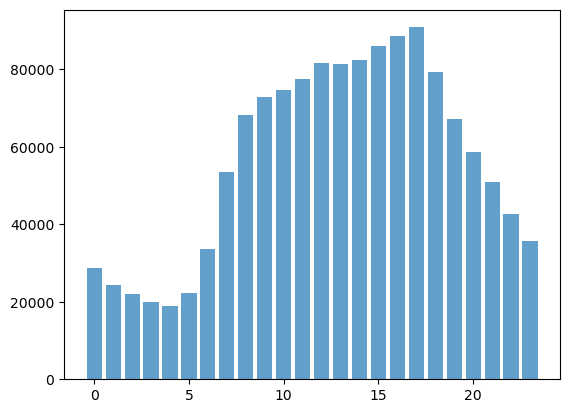

In [70]:
plt.bar(orders_count.index,orders_count.values,label = "actual counts",alpha = 0.7)

In [71]:
x = np.arange(0,orders_count.max(),+1)
poi = poisson.pmf(x,mean_orders_per_hour)

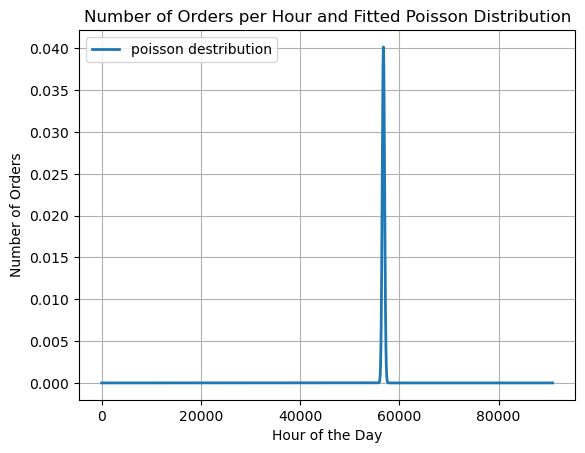

Poisson distribution is estimated to be: 56792.00


In [72]:
plt.plot(x,poi*len(orders_count),lw=2,label = "poisson destribution")

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Hour and Fitted Poisson Distribution')
plt.legend()
plt.grid(True)
plt.show()


print(f"Poisson distribution is estimated to be: {mean_orders_per_hour:.2f}")

* Poisson distribution is estimated to be: 56792.00.Because Poisson distribution based on the averate rate of time and space .so,That's why we used poisson distribution